In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LinearRegression:
    def __init__(self, x, y, alpha, iterations):
        self.x = x
        self.y = y
        self.alpha = alpha
        self.iterations = iterations 
        self.b = 0
        self.w = 0
        
    def fit(self):
        cost_history = []
        m = len(self.x)
        for i in range(self.iterations):
            cost = 0
            grad_b = 0
            grad_w = 0
            for j in range(m):
                ypred = self.b + np.dot(x[j], self.w)
                cost += (0.5*m)*((ypred - y[j])**2)
                grad_b += (1/m)*(ypred - y[j])
                grad_w += (1/m)*np.dot(x[j], (ypred-y[j]))
            cost_history.append(cost)
            self.b -= self.alpha*grad_b
            self.w -= self.alpha*grad_w
        
        return self.b, self.w, cost_history

__Dataset is taken from Superdatascience.com__ 

In [3]:
data = pd.read_csv('Salary_Data.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

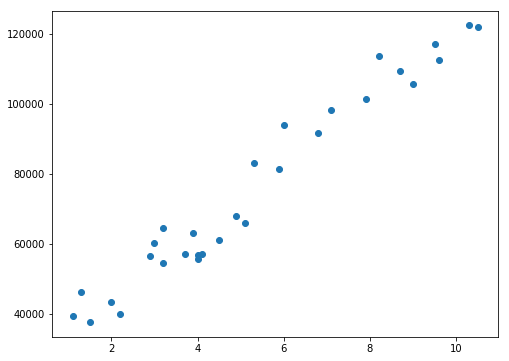

In [6]:
fig1 = plt.figure(figsize=(8,6))
plt.scatter(x, y)

In [7]:
#Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
linreg = LinearRegression(xtrain, ytrain, 0.01, 2000)
b, w, cost_history = linreg.fit()

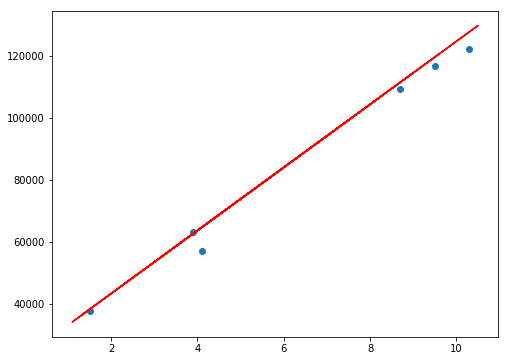

In [9]:
fig2 = plt.figure(figsize=(8,6))
plt.scatter(xtest, ytest)
plt.plot(xtrain, (b + w*xtrain), color='red')

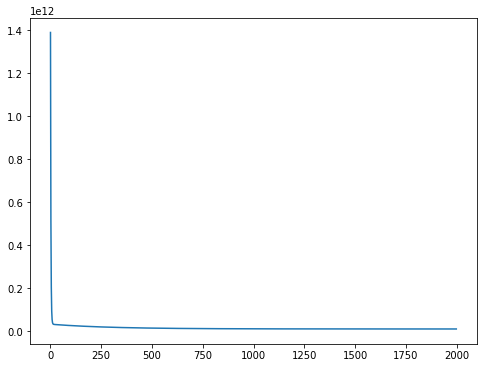

In [10]:
fig3 = plt.figure(figsize=(8,6))
x_axis= np.arange(0, len(cost_history))
plt.plot(x_axis, cost_history)